#### Importing the necessary Libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Import and Understand the dataset

In [130]:
df = pd.read_csv('data/train.csv')


In [131]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
df.shape

(891, 12)

#####  1. Information of Dataset
+ PassengerID: Unique number to identify each passenger
+ Pclass: Class in which the passenger was travelling(1, 2, 3)
+ Sex(gender): Male / Female
+ Age: Age of the passenger 
+ SibSp: Sibling/Spouse travelling with the passenger
+ Fare: The amount paid by the passenger for the ticket
+ Embarked: The station from which the passenger boarded the ship


In [133]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2. Exploratory Data Analysis (EDA)

##### 🔍 Missing Values and Data Quality
+ We inspected the dataset for missing values and duplicates. Knowing which features have nulls helps in deciding imputation strategies later. The dataset was also checked for data types and number of unique entries per feature.


In [135]:
# Check if there are any missing values in the data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
# Check for duplicate rows in the data
df.duplicated().sum()

0

In [137]:
### Number of unique values in each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [138]:
print("Categories in 'Survived' column: ", end=" ")
print(df['Survived'].unique())

print("Categories in 'Pclass' column: ", end= " ")
print(df['Pclass'].unique())

print("Categories in 'Sex' column: ", end=" ")
print(df['Sex'].unique())

print("Categories in 'Embarked' column: ", end=" ")
print(df['Embarked'].unique())

Categories in 'Survived' column:  [0 1]
Categories in 'Pclass' column:  [3 1 2]
Categories in 'Sex' column:  ['male' 'female']
Categories in 'Embarked' column:  ['S' 'C' 'Q' nan]


In [140]:
# Drop the columns which will not be contributing in the analysis

df = df.drop(columns=['Name','Ticket', 'Cabin'])

In [143]:
## define numerical and categorical columns 

numerical_columns = [feature for feature in df.columns if df[feature].dtypes !='O']
categorical_columns = [feature for feature in df.columns if df[feature].dtypes =='O']

print("We have {} numerical features ".format(len(numerical_columns), numerical_columns))
print("We have {} categorical features ".format(len(categorical_columns), categorical_columns))


We have 7 numerical features 
We have 2 categorical features 


In [144]:
df['FamilySize'] = df['SibSp'] + df['Parch'] +  1

### Data Exploration (Visualisation)


#### Univariate Analysis

<Axes: xlabel='Fare', ylabel='Count'>

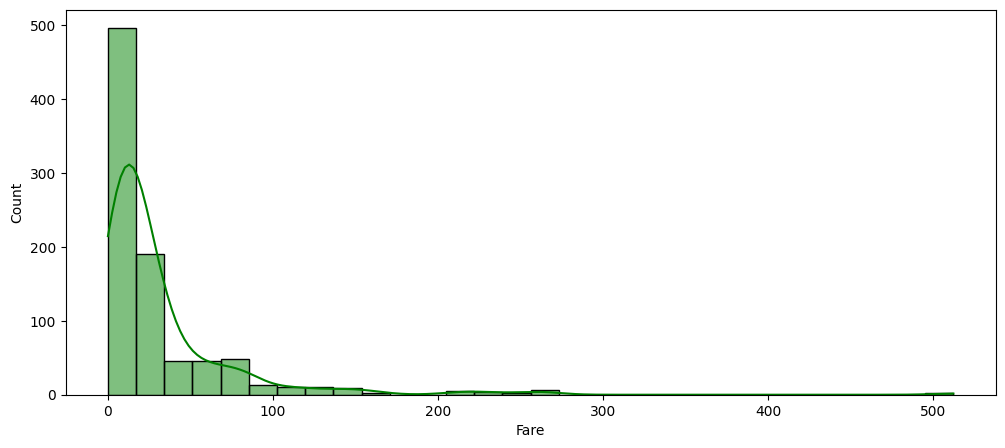

In [ ]:

sns.histplot(data=df, x = 'Fare', kde = True, bins = 30, color='g')


+ We can observe that the chart for Fare is skewed, 

<Axes: xlabel='Age', ylabel='Count'>

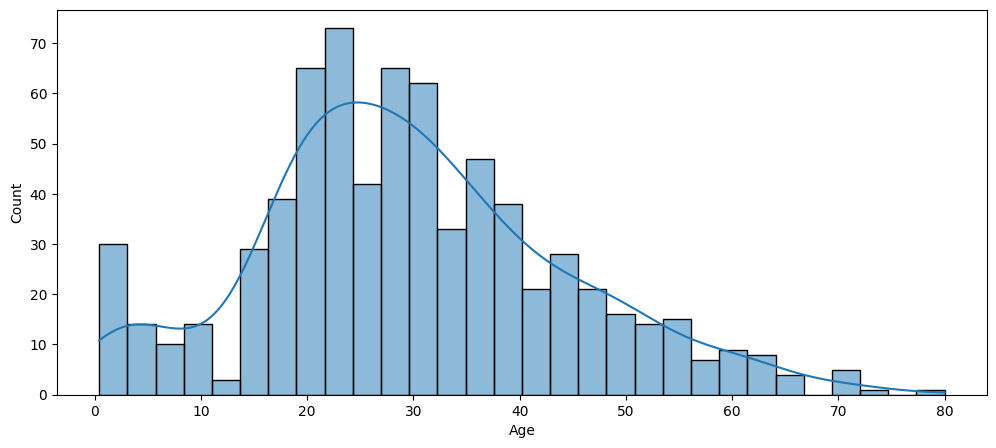

In [146]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)


In [147]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1


(-1.25, 1.25, -1.25, 1.25)

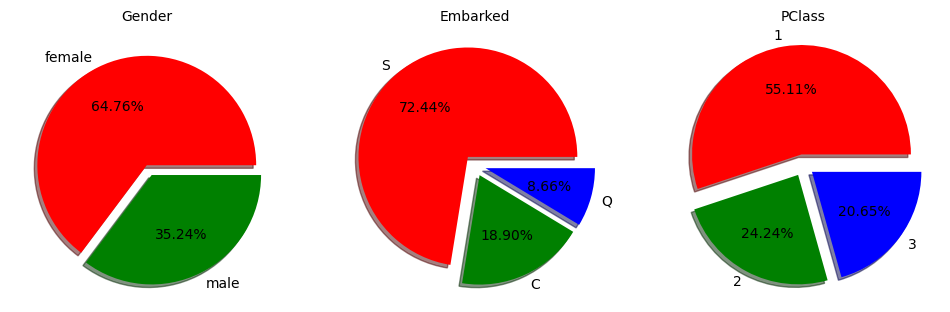

In [148]:
plt.rcParams['figure.figsize'] = (12,5)

plt.subplot(1, 3, 1)
size = df['Sex'].value_counts()
labels = "female", "male"
color=["red","green"]

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', shadow=True, explode=[0,0.1])
plt.title('Gender', fontsize=10)
plt.axis('off')

plt.subplot(1, 3, 2)
size=df['Embarked'].value_counts()
labels= "S","C","Q"
color=['red','green','blue']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', shadow=True, explode=[0.1,0.1,0.1])
plt.title('Embarked', fontsize=10)
plt.axis('off')

plt.subplot(1, 3, 3)
size=df['Pclass'].value_counts()
labels= "1","2","3"
color=['red','green','blue']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', shadow=True, explode=[0.1,0.1,0.1])
plt.title('PClass', fontsize=10)
plt.axis('off')

<Axes: xlabel='Age', ylabel='Count'>

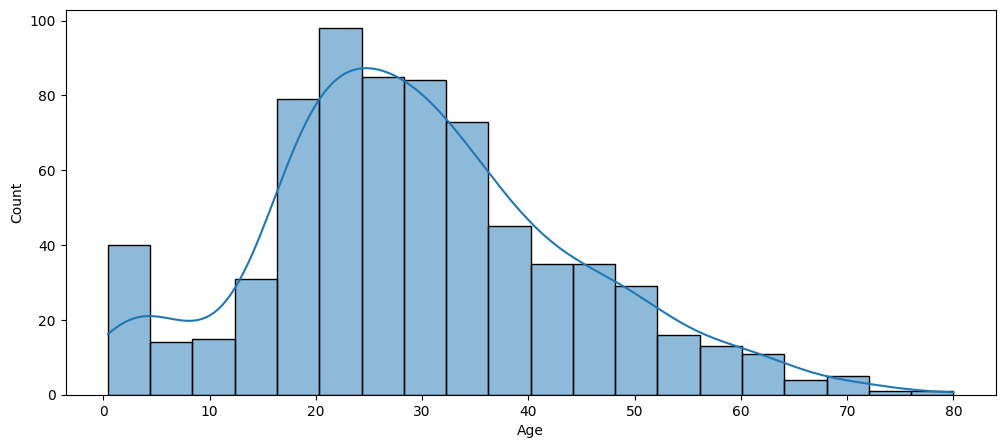

In [149]:
sns.histplot(data=df, x = 'Age', kde=True, bins=20)

<Axes: xlabel='Fare'>

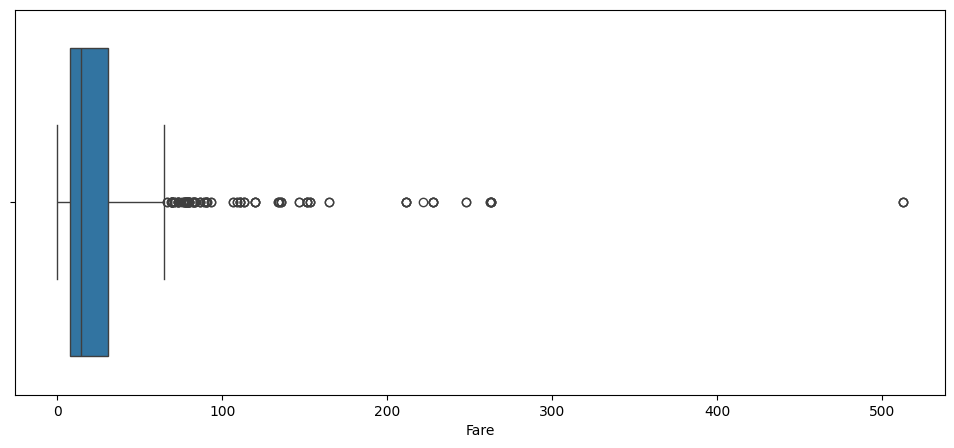

In [150]:
sns.boxplot(data=df, x= 'Fare')

### 📊 Survival Rate by Category

- **Gender**: Females had a significantly higher survival rate (~74%) compared to males (~19%), suggesting a "women and children first" policy.
- **Class**: Passengers in 1st class had the highest chance of survival, while 3rd class had the lowest.
- **Embarked**: Those who boarded at Cherbourg (C) had higher survival rates, possibly due to class distribution.

These features appear to be strong predictors of survival.


#### Bivariate Analysis


C:\Users\sucha\AppData\Local\Temp\ipykernel_35580\2307856578.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\sucha\AppData\Local\Temp\ipykernel_35580\2307856578.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\sucha\AppData\Local\Temp\ipykernel_35580\2307856578.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


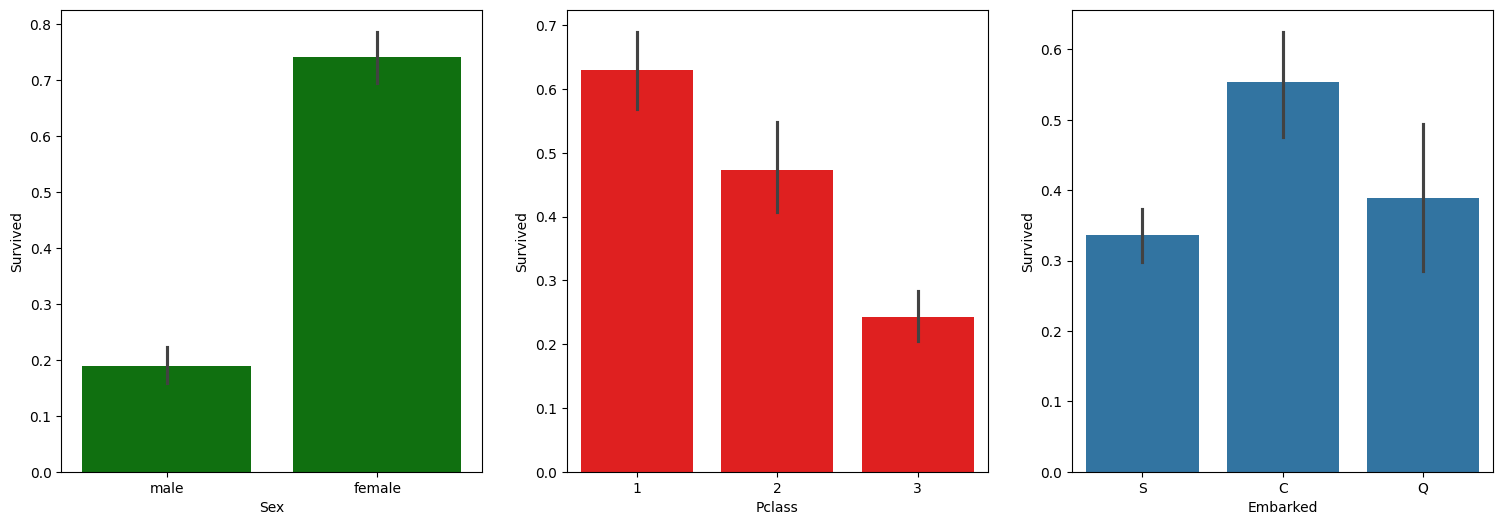

In [151]:
plt.subplots(1, 3, figsize = (25,6))
plt.subplot(141)
ax = sns.barplot(x='Sex', y='Survived', data=df, color='g')
plt.subplot(142)
ax = sns.barplot(x='Pclass', y='Survived', data=df, color='r')
plt.subplot(143)
ax= sns.barplot(x='Embarked', y= 'Survived', data=df)
plt.show()

In [153]:
df['FamilySize'].min(), df['FamilySize'].max()

(1, 11)

<Axes: xlabel='FamilySize', ylabel='Survived'>

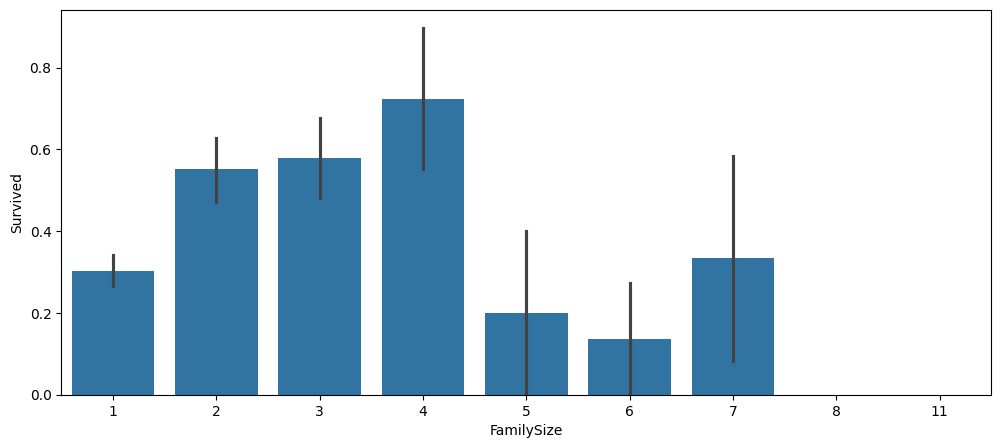

In [155]:
sns.barplot(data=df, x='FamilySize', y='Survived')

### 👨‍👩‍👧‍👦 Family Size vs Survival

We engineered a `FamilySize` feature by summing siblings/spouses and parents/children aboard (+1 for self). 
- **Observation**: Passengers with small families (2-4 members) had better survival chances. Those traveling alone or with large families had lower survival rates.


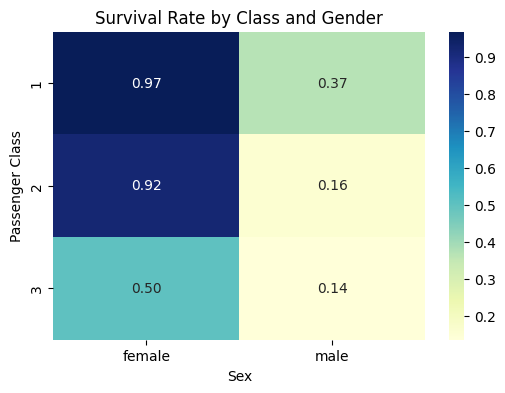

In [157]:
# Create the crosstab
survival_rate = pd.crosstab(df['Pclass'], df['Sex'], values=df['Survived'], aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(survival_rate, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Survival Rate by Class and Gender")
plt.ylabel("Passenger Class")
plt.xlabel("Sex")
plt.show()

### 🔥 Multivariate Insight: Class and Gender

Combining `Pclass` and `Sex` reveals deeper patterns:
- **Females in 1st class** had the highest survival rates.
- **Males in 3rd class** had the lowest.
This interaction highlights that survival wasn’t just about one factor — multiple features together played a role.


In [162]:
# Creating a new column IsAlone (0 = Not Alone, 1= Alone)
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x==1 else 0)

<Axes: xlabel='IsAlone', ylabel='Survived'>

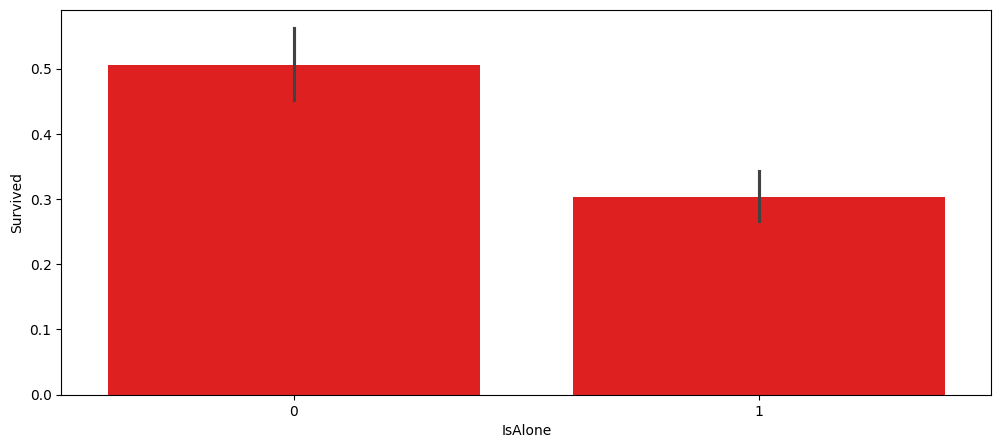

In [163]:
sns.barplot(x='IsAlone', y='Survived', data=df, color='r')

### 🧍 IsAlone Feature

Created a new binary feature `IsAlone`:
- 1: Passenger is alone (FamilySize == 1)
- 0: Passenger is with family

**Insight**: Solo passengers were less likely to survive, again reinforcing the importance of group dynamics during the disaster.
